In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

In [7]:
### Cargar data
data = pd.read_csv("D:/PERSONAL/CIBERTEC/PYTHON_DATA_SCIENCE/fuentes/fuentes/nba_all_elo.csv")
data.head()

,gameorder,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
0,1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
1,1,194611010TRH,NBA,1,1947,11/1/1946,1,0,NYK,Knicks,...,41.705170,TRH,Huskies,66,1300.0000,1293.2767,A,W,0.359935,NaN
2,2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,2,194611020CHS,NBA,1,1947,11/2/1946,2,0,NYK,Knicks,...,40.692783,CHS,Stags,63,1300.0000,1309.6521,A,L,0.368899,NaN
4,3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN


In [8]:
data.shape

(126314, 23)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126314 entries, 0 to 126313
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   gameorder      126314 non-null  int64  
 1   game_id        126314 non-null  object 
 2   lg_id          126314 non-null  object 
 3   _iscopy        126314 non-null  int64  
 4   year_id        126314 non-null  int64  
 5   date_game      126314 non-null  object 
 6   seasongame     126314 non-null  int64  
 7   is_playoffs    126314 non-null  int64  
 8   team_id        126314 non-null  object 
 9   fran_id        126314 non-null  object 
 10  pts            126314 non-null  int64  
 11  elo_i          126314 non-null  float64
 12  elo_n          126314 non-null  float64
 13  win_equiv      126314 non-null  float64
 14  opp_id         126314 non-null  object 
 15  opp_fran       126314 non-null  object 
 16  opp_pts        126314 non-null  int64  
 17  opp_elo_i      126314 non-nul

In [12]:
### Ver las columnas del data frame
data.columns

Index(['gameorder', 'game_id', 'lg_id', '_iscopy', 'year_id', 'date_game',
       'seasongame', 'is_playoffs', 'team_id', 'fran_id', 'pts', 'elo_i',
       'elo_n', 'win_equiv', 'opp_id', 'opp_fran', 'opp_pts', 'opp_elo_i',
       'opp_elo_n', 'game_location', 'game_result', 'forecast', 'notes'],
      dtype='object')

In [13]:
## Quedarme con todos los que no son copias
data["_iscopy"]==0

0          True
1         False
2          True
3         False
4          True
          ...  
126309     True
126310     True
126311    False
126312     True
126313    False
Name: _iscopy, Length: 126314, dtype: bool

In [15]:
data_unique = data[data["_iscopy"]==0]

In [19]:
data_unique.reset_index(drop=True, inplace=True)


In [24]:
data_unique.set_index(keys="gameorder")

,game_id,lg_id,_iscopy,year_id,date_game,seasongame,is_playoffs,team_id,fran_id,pts,...,win_equiv,opp_id,opp_fran,opp_pts,opp_elo_i,opp_elo_n,game_location,game_result,forecast,notes
gameorder,,,,,,,,,,,,,,,,,,,,,
1,194611010TRH,NBA,0,1947,11/1/1946,1,0,TRH,Huskies,66,...,40.294830,NYK,Knicks,68,1300.0000,1306.7233,H,L,0.640065,NaN
2,194611020CHS,NBA,0,1947,11/2/1946,1,0,CHS,Stags,63,...,42.012257,NYK,Knicks,47,1306.7233,1297.0712,H,W,0.631101,NaN
3,194611020DTF,NBA,0,1947,11/2/1946,1,0,DTF,Falcons,33,...,38.864048,WSC,Capitols,50,1300.0000,1320.3811,H,L,0.640065,NaN
4,194611020PRO,NBA,0,1947,11/2/1946,1,0,PRO,Steamrollers,59,...,41.540619,BOS,Celtics,53,1300.0000,1294.8458,H,W,0.640065,NaN
5,194611020STB,NBA,0,1947,11/2/1946,1,0,STB,Bombers,56,...,41.492020,PIT,Ironmen,51,1300.0000,1295.3092,H,W,0.640065,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63153,201506070GSW,NBA,0,2015,6/7/2015,99,1,GSW,Warriors,93,...,67.029549,CLE,Cavaliers,95,1708.1705,1716.8708,H,L,0.757674,NaN
63154,201506090CLE,NBA,0,2015,6/9/2015,99,1,CLE,Cavaliers,96,...,61.826408,GSW,Warriors,91,1797.5032,1790.9591,H,W,0.527843,NaN
63155,201506110CLE,NBA,0,2015,6/11/2015,100,1,CLE,Cavaliers,82,...,60.309792,GSW,Warriors,103,1790.9591,1809.9791,H,L,0.546572,NaN


In [29]:
### Cuantos partidos hay de los Knicks como locales?
respuesta = data_unique[data_unique["team_id"]=="NYK"].shape[0]
print(f"los Knicks tienen {respuesta} partidos como locales en el dataSet")

los Knicks tienen 2855 partidos como locales en el dataSet


In [30]:
### Cuantos partidos han ganado los Knicks como locales ?
respuesta = data_unique[
    (data_unique["team_id"]=="NYK") &
    (data_unique["game_result"]=="W")
].shape[0]
print(f"los Knicks han ganado {respuesta} partidos como locales en el dataSet")

los Knicks han ganado 1723 partidos como locales en el dataSet


In [31]:
### Cuantos partidos han ganado y han perdido los Knicks como locales
solo_knicks = data_unique[data_unique["team_id"]=="NYK"]
solo_knicks["game_result"].value_counts()

game_result
W    1723
L    1132
Name: count, dtype: int64

In [32]:
### Cual es la proporcion de partidos ganados y perdidos por los knicks como locales ?

total = solo_knicks.shape[0]
solo_knicks["game_result"].value_counts() / total

game_result
W    0.603503
L    0.396497
Name: count, dtype: float64

In [33]:
### Cual es la propocion de partidos ganados y perdidos por los knicks como locales ?
solo_knicks["game_result"].value_counts(normalize=True)

game_result
W    0.603503
L    0.396497
Name: proportion, dtype: float64

Text(0.5, 1.0, 'Promedio de puntos')

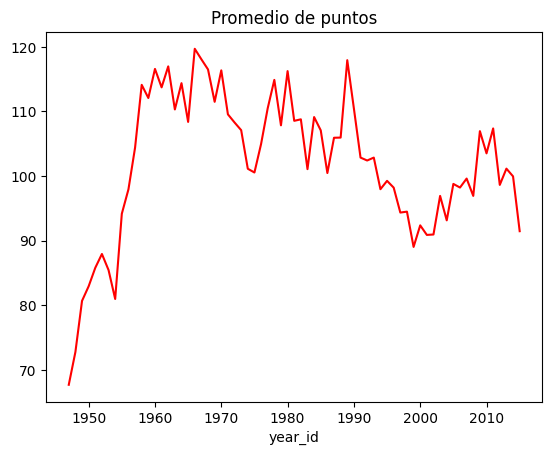

In [39]:
solo_knicks.groupby(["year_id"])["pts"].mean().plot(color="red")
plt.title("Promedio de puntos")

In [42]:
### Cual es el promedio de puntos de los knicks como locales por año segun resultado?

solo_knicks.groupby(["year_id","game_result"])["pts"].mean()

year_id  game_result
1947     L               58.833333
         W               73.000000
1948     L               66.250000
         W               78.769231
1949     L               74.916667
                           ...    
2013     W              103.527778
2014     L               94.454545
         W              106.315789
2015     L               88.451613
         W              100.800000
Name: pts, Length: 138, dtype: float64

<Axes: xlabel='year_id'>

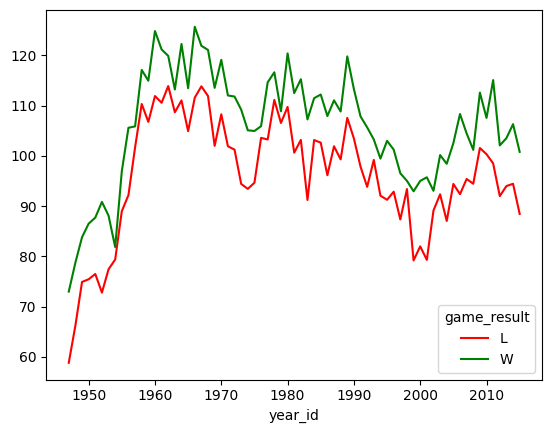

In [48]:
pd.pivot_table(
    data=solo_knicks,
    values="pts",
    index="year_id",
    columns="game_result",
    aggfunc="mean",
).plot(color=("red","green"))

In [50]:
### Otras cosas importantes
solo_knicks.rename(columns={"_iscopy":"is_copy"}, inplace=True)

In [51]:
### Caso Titanic
data = pd.read_csv("D:/PERSONAL/CIBERTEC/PYTHON_DATA_SCIENCE/fuentes/fuentes/train.csv")
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [59]:
from sklearn.model_selection import train_test_split

vars = [
    "Pclass",
    "Sex",
    "Age",
    "Fare",
    "Name",
    "Embarked"
]

x = data[vars]
y = data["Survived"]

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=123)
print(x_train.shape)
print(x_test.shape)

(712, 6)
(179, 6)


<Axes: >

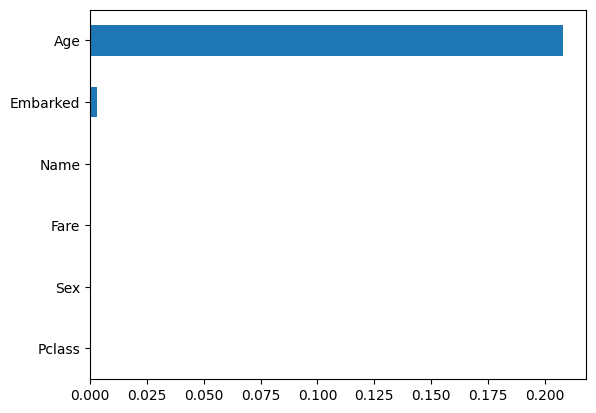

In [64]:
### Porcentaje de valores nulos
x_train.isna().mean().sort_values(ascending = True).plot(kind = "barh")

In [65]:
data.groupby(["Sex","Survived","Pclass"]).agg(
    {
        "Age":"mean",
        "PassengerId":"count",
        "Fare":"mean"
    }
)

Age  PassengerId        Fare
Sex    Survived Pclass                                    
female 0        1       25.666667            3  110.604167
                2       36.000000            6   18.250000
                3       23.818182           72   19.773093
       1        1       34.939024           91  105.978159
                2       28.080882           70   22.288989
                3       19.329787           72   12.464526
male   0        1       44.581967           77   62.894910
                2       33.369048           91   19.488965
                3       27.255814          300   12.204469
       1        1       36.248000           45   74.637320
                2       16.022000           17   21.095100
                3       22.274211           47   15.579696